# 5. Saving and Loading Models in PyTorch

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import utils
import fully_connected_model

In [2]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

train_set = datasets.FashionMNIST('Fashion_MNIST_data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.FashionMNIST('Fashion_MNIST_data/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

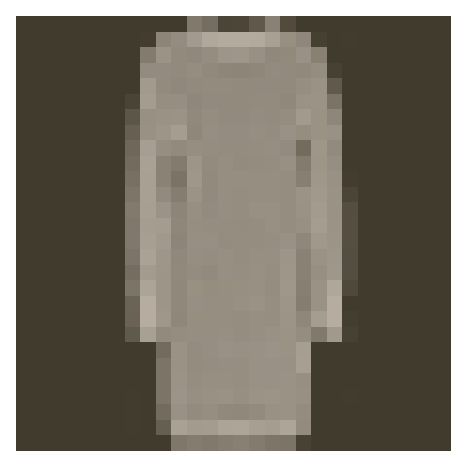

In [3]:
image, label = next(iter(train_loader))
utils.show_image(image[0, :])

In [4]:
model = fully_connected_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
fully_connected_model.train(model, train_loader, test_loader, criterion, optimizer, epochs=5)

Epoch: 1/5...
Training Loss: 1.6235986423492432
Test Loss: 0.9154163735687353
Test Accuracy: 0.6792396306991577
Epoch: 1/5...
Training Loss: 0.9752584481239319
Test Loss: 0.7256749298921816
Test Accuracy: 0.7054139971733093
Epoch: 1/5...
Training Loss: 0.8301907765865326
Test Loss: 0.677095987424729
Test Accuracy: 0.7316879034042358
Epoch: 1/5...
Training Loss: 0.74727776825428
Test Loss: 0.613529212915214
Test Accuracy: 0.7734872698783875
Epoch: 1/5...
Training Loss: 0.7528123140335083
Test Loss: 0.5955675179791299
Test Accuracy: 0.7789610028266907
Epoch: 1/5...
Training Loss: 0.6439961528778076
Test Loss: 0.5613464435954003
Test Accuracy: 0.7851313948631287
Epoch: 1/5...
Training Loss: 0.6528783798217773
Test Loss: 0.5853956286694594
Test Accuracy: 0.7837380766868591
Epoch: 1/5...
Training Loss: 0.652821562886238
Test Loss: 0.5326152460969937
Test Accuracy: 0.7987658977508545
Epoch: 1/5...
Training Loss: 0.6515187990665435
Test Loss: 0.5318190267511235
Test Accuracy: 0.80244827270507

Epoch: 4/5...
Training Loss: 0.46924746215343477
Test Loss: 0.4222900622589573
Test Accuracy: 0.8469347357749939
Epoch: 4/5...
Training Loss: 0.46350632309913636
Test Loss: 0.42874700552339007
Test Accuracy: 0.8392714858055115
Epoch: 5/5...
Training Loss: 0.48928523421287534
Test Loss: 0.4047617115982019
Test Accuracy: 0.8543989062309265
Epoch: 5/5...
Training Loss: 0.4382611295580864
Test Loss: 0.41814609061760505
Test Accuracy: 0.8459395170211792
Epoch: 5/5...
Training Loss: 0.4956448757648468
Test Loss: 0.4025262423381684
Test Accuracy: 0.8558917045593262
Epoch: 5/5...
Training Loss: 0.43382257014513015
Test Loss: 0.40935344462561757
Test Accuracy: 0.8503184914588928
Epoch: 5/5...
Training Loss: 0.45617676675319674
Test Loss: 0.4280296883955123
Test Accuracy: 0.8446456789970398
Epoch: 5/5...
Training Loss: 0.45082080334424973
Test Loss: 0.40685346589726246
Test Accuracy: 0.8458399772644043
Epoch: 5/5...
Training Loss: 0.46354219049215317
Test Loss: 0.41227705064852527
Test Accuracy:

In [6]:
print(f'Our model: \n\n{model}\n')
print(f'The state dict keys:\n\n {model.state_dict().keys()}')

Our model: 

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)

The state dict keys:

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [7]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [8]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [9]:
model.load_state_dict(state_dict)

In [10]:
model = fully_connected_model.Network(784, 10, [400, 200, 100])

# Will fail because the tensor sizes are wrong
model.load_state_dict(state_dict)

RuntimeError: Error(s) in loading state_dict for Network:
	size mismatch for hidden_layers.0.weight: copying a param of torch.Size([400, 784]) from checkpoint, where the shape is torch.Size([512, 784]) in current model.
	size mismatch for hidden_layers.0.bias: copying a param of torch.Size([400]) from checkpoint, where the shape is torch.Size([512]) in current model.
	size mismatch for hidden_layers.1.weight: copying a param of torch.Size([200, 400]) from checkpoint, where the shape is torch.Size([256, 512]) in current model.
	size mismatch for hidden_layers.1.bias: copying a param of torch.Size([200]) from checkpoint, where the shape is torch.Size([256]) in current model.
	size mismatch for hidden_layers.2.weight: copying a param of torch.Size([100, 200]) from checkpoint, where the shape is torch.Size([128, 256]) in current model.
	size mismatch for hidden_layers.2.bias: copying a param of torch.Size([100]) from checkpoint, where the shape is torch.Size([128]) in current model.
	size mismatch for output.weight: copying a param of torch.Size([10, 100]) from checkpoint, where the shape is torch.Size([10, 128]) in current model.

In [ ]:
checkpoint: {
        'input_size': 784,
        'output_size': 10,
        'hidden_layers': [l.out_features for l in model.hidden_layers],
        'state_dict': model.state_dict()
    }
torch.save(checkpoint, 'checkpoint.pth')

In [ ]:
def load_checkpoint(path):
    checkpoint = torch.load(path)
    model = fully_connected_model.Network(checkpoint['input_size'],
                                          checkpoint['output_size'],
                                          checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model                                                

In [ ]:
model = load_checkpoint('checkpoint.pth')
print(model)